In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

In [ ]:
path = kagglehub.dataset_download("jacobvs/ddos-attack-network-logs")

In [ ]:
path

'/kaggle/input/ddos-attack-network-logs'

In [ ]:
!ls '/root/.cache/kagglehub/datasets/jacobvs/ddos-attack-network-logs/versions/1'

ls: cannot access '/root/.cache/kagglehub/datasets/jacobvs/ddos-attack-network-logs/versions/1': No such file or directory


In [ ]:
from scipy.io import arff

In [ ]:
data, meta = arff.loadarff(path + '/final-dataset.arff')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184.0,22.0,10.0,b'ack',55.0,b'-------',11.0,1343.0,...,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1.030013,50.040562,b'Normal'
2160664,24.12,12.00,376386.0,23.0,22.0,b'ack',55.0,b'-------',13.0,10991.0,...,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1.030026,50.051067,b'Normal'
2160665,1.00,24.10,140121.0,21.0,23.0,b'tcp',1540.0,b'-------',2.0,4374.0,...,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1.000000,50.013418,b'Normal'
2160666,5.00,24.50,26800.0,5.0,21.0,b'tcp',1540.0,b'-------',6.0,832.0,...,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1.000000,50.027339,b'Normal'


In [ ]:
print(df.columns)

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object')


In [ ]:
df['FLOW_DURATION'] = df['LAST_PKT_RESEVED'] - df['FIRST_PKT_SENT']

In [ ]:
df.drop(columns=['LAST_PKT_RESEVED', 'FIRST_PKT_SENT'], inplace=True)

In [ ]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,b'Normal',49.021920
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,b'Normal',49.030211
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,b'UDP-Flood',49.030176
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,b'Normal',49.030040
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,b'Normal',49.031810


In [ ]:
df['FLOW_DURATION']

,FLOW_DURATION
0,49.021920
1,49.030211
2,49.030176
3,49.030040
4,49.031810
...,...
2160663,49.010549
2160664,49.021041
2160665,49.013418
2160666,49.027339


In [ ]:
df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION'],
      dtype='object')

In [ ]:
unique_pkt_types = df['PKT_TYPE'].unique()

In [ ]:
unique_pkt_types = df['PKT_TYPE'].unique()
print(unique_pkt_types)

[b'tcp' b'ack' b'cbr' b'ping']


In [ ]:
df['PKT_TYPE'] = df['PKT_TYPE'].str.decode('utf-8')


In [ ]:
unique_pkt_types = df['PKT_TYPE'].unique()
print(unique_pkt_types)

['tcp' 'ack' 'cbr' 'ping']


In [ ]:
unique_flag_types = df['FLAGS'].unique()
print(unique_flag_types)

[b'-------' b'---A---']


In [ ]:
df['FLAGS'] = df['FLAGS'].str.decode('utf-8')
unique_flag_types = df['FLAGS'].unique()
print(unique_flag_types)

['-------' '---A---']


In [ ]:
df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_TYPE',
       'PKT_SIZE', 'FLAGS', 'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT',
       'NUMBER_OF_BYTE', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_IN', 'PKT_OUT',
       'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION'],
      dtype='object')

In [ ]:
df.drop(columns=['SEQ_NUMBER', 'FID','PKT_ID', 'SRC_ADD','DES_ADD', 'NODE_NAME_FROM','NODE_NAME_TO'], inplace=True)

In [ ]:
df.columns

Index(['FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'FLAGS',
       'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R',
       'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION'],
      dtype='object')

In [ ]:
df.head()

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION
0,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,b'Normal',49.021920
1,23.0,24.0,tcp,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,b'Normal',49.030211
2,23.0,22.0,ack,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,b'UDP-Flood',49.030176
3,23.0,21.0,ack,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,b'Normal',49.030040
4,23.0,21.0,ack,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,b'Normal',49.031810


In [ ]:
df['PKT_CLASS'] = df['PKT_CLASS'].str.decode('utf-8')


In [ ]:
flag_mapping = ['U', 'A', 'P', 'R', 'S', 'F', 'X']
for i, flag in enumerate(flag_mapping):
    df[f'FLAG_{flag}'] = df['FLAGS'].apply(lambda x: 1 if x[i] != '-' else 0)

In [ ]:
df.columns

Index(['FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'FLAGS',
       'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R',
       'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION', 'FLAG_U', 'FLAG_A', 'FLAG_P', 'FLAG_R',
       'FLAG_S', 'FLAG_F', 'FLAG_X'],
      dtype='object')

In [ ]:
df.drop(columns=['FLAG_U', 'FLAG_A','FLAG_P', 'FLAG_S','FLAG_F', 'FLAG_X'], inplace=True)

In [ ]:
len(df.columns)

20

In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# le = LabelEncoder()
# df['PKT_TYPE'] = le.fit_transform(df['PKT_TYPE'])
# df['PKT_CLASS'] = le.fit_transform(df['PKT_CLASS'])

In [ ]:
df.head()

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920,0
1,23.0,24.0,tcp,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211,0
2,23.0,22.0,ack,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176,0
3,23.0,21.0,ack,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040,0
4,23.0,21.0,ack,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810,0


In [ ]:
# sc = StandardScaler()
# df['FLOW_DURATION'] = sc.fit_transform(df[['FLOW_DURATION']])
# df['NUMBER_OF_BYTE'] = sc.fit_transform(df[['NUMBER_OF_BYTE']])
# df['PKT_SIZE'] = sc.fit_transform(df[['PKT_SIZE']])

In [ ]:
df.columns

Index(['FROM_NODE', 'TO_NODE', 'PKT_TYPE', 'PKT_SIZE', 'FLAGS',
       'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN', 'PKT_OUT', 'PKT_R',
       'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE', 'PKT_AVG_SIZE',
       'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME', 'PKT_RESEVED_TIME',
       'PKT_CLASS', 'FLOW_DURATION', 'FLAG_R'],
      dtype='object')

In [ ]:
df.head()

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,tcp,1540.0,-------,16091.0,24780100.0,35.529786,35.529786,35.539909,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920,0
1,23.0,24.0,tcp,1540.0,-------,16092.0,24781700.0,20.176725,20.176725,20.186848,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211,0
2,23.0,22.0,ack,55.0,-------,16092.0,885060.0,7.049955,7.049955,7.059958,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176,0
3,23.0,21.0,ack,55.0,-------,16085.0,884675.0,39.627970,39.627970,39.637973,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040,0
4,23.0,21.0,ack,55.0,-------,16088.0,884840.0,16.039806,16.039806,16.049810,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810,0


In [ ]:
unique_flag_types = df['FLAG_R'].unique()
print(unique_flag_types)

[0 1]


In [ ]:
df.drop(columns=['FLAGS'], inplace=True)

In [ ]:
df.head()

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,tcp,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,Normal,49.021920,0
1,23.0,24.0,tcp,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,Normal,49.030211,0
2,23.0,22.0,ack,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,UDP-Flood,49.030176,0
3,23.0,21.0,ack,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,Normal,49.030040,0
4,23.0,21.0,ack,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,Normal,49.031810,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['PKT_TYPE'] = le.fit_transform(df['PKT_TYPE'])
df['PKT_CLASS'] = le.fit_transform(df['PKT_CLASS'])

In [ ]:
df.head()

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,3,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1,49.021920,0
1,23.0,24.0,3,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1,49.030211,0
2,23.0,22.0,0,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,4,49.030176,0
3,23.0,21.0,0,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1,49.030040,0
4,23.0,21.0,0,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1,49.031810,0


In [ ]:
inverse_tranform = le.inverse_transform(df['PKT_TYPE'])

In [ ]:
print(np.unique(inverse_tranform))

['HTTP-FLOOD' 'Normal' 'SIDDOS' 'Smurf']


In [ ]:
inverse_transform_class = le.inverse_transform(df['PKT_CLASS'])
print(np.unique(inverse_transform_class))

['HTTP-FLOOD' 'Normal' 'SIDDOS' 'Smurf' 'UDP-Flood']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = df.drop(columns=['PKT_CLASS'])
y = df['PKT_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9794600748841794


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       810
           1       0.99      0.99      0.99    387250
           2       0.87      0.86      0.86      1325
           3       0.48      0.32      0.38      2567
           4       0.95      0.90      0.92     40182

    accuracy                           0.98    432134
   macro avg       0.84      0.80      0.82    432134
weighted avg       0.98      0.98      0.98    432134



In [ ]:
pkt_type_mapping = pd.Series(df['PKT_TYPE'].unique()).sort_values().reset_index(drop=True)
pkt_type_inverse_map = dict(enumerate(pkt_type_mapping))
print("PKT_TYPE mapping (int → label):")
print(pkt_type_inverse_map)

PKT_TYPE mapping (int → label):
{0: 0, 1: 1, 2: 2, 3: 3}


In [ ]:
df

,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,PKT_CLASS,FLOW_DURATION,FLAG_R
0,21.0,23.0,3,1540.0,16091.0,24780100.0,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1,49.021920,0
1,23.0,24.0,3,1540.0,16092.0,24781700.0,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1,49.030211,0
2,23.0,22.0,0,55.0,16092.0,885060.0,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,4,49.030176,0
3,23.0,21.0,0,55.0,16085.0,884675.0,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1,49.030040,0
4,23.0,21.0,0,55.0,16088.0,884840.0,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1,49.031810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,22.0,10.0,0,55.0,16103.0,885665.0,5.295040,5.295040,5.305043,0.0,328.561918,18070.9,55.0,0.008446,0.0,5.275034,5.305043,1,49.010549,0
2160664,23.0,22.0,0,55.0,16103.0,885665.0,34.508649,34.508649,34.518652,0.0,328.491596,18067.0,55.0,0.008446,0.0,34.498646,34.528655,1,49.021041,0
2160665,21.0,23.0,3,1540.0,16091.0,24780100.0,14.418011,14.418011,14.428134,0.0,328.297855,505578.0,1540.0,0.236321,0.0,14.407888,14.438258,1,49.013418,0
2160666,5.0,21.0,3,1540.0,16091.0,24780100.0,3.732227,3.732227,3.742350,0.0,328.204637,505434.0,1540.0,0.236321,0.0,3.732227,3.762597,1,49.027339,0


In [ ]:
newdf = pd.DataFrame(data)

In [ ]:
newdf.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create separate encoders
le_pkt_type = LabelEncoder()
le_pkt_class = LabelEncoder()

# Fit-transform each column with its own encoder
newdf['PKT_TYPE'] = le_pkt_type.fit_transform(newdf['PKT_TYPE'])
newdf['PKT_CLASS'] = le_pkt_class.fit_transform(newdf['PKT_CLASS'])

# Show mappings
print("PKT_TYPE mapping:", dict(zip(le_pkt_type.classes_, le_pkt_type.transform(le_pkt_type.classes_))))
print("PKT_CLASS mapping:", dict(zip(le_pkt_class.classes_, le_pkt_class.transform(le_pkt_class.classes_))))


PKT_TYPE mapping: {b'ack': np.int64(0), b'cbr': np.int64(1), b'ping': np.int64(2), b'tcp': np.int64(3)}
PKT_CLASS mapping: {b'HTTP-FLOOD': np.int64(0), b'Normal': np.int64(1), b'SIDDOS': np.int64(2), b'Smurf': np.int64(3), b'UDP-Flood': np.int64(4)}


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:29:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9862681483058495

Confusion Matrix:
 [[   769      1     40      0      0]
 [     8 387205     37      0      0]
 [     1     54   1270      0      0]
 [     8   1672     69    818      0]
 [     0   4044      0      0  36138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       810
           1       0.99      1.00      0.99    387250
           2       0.90      0.96      0.93      1325
           3       1.00      0.32      0.48      2567
           4       1.00      0.90      0.95     40182

    accuracy                           0.99    432134
   macro avg       0.97      0.83      0.86    432134
weighted avg       0.99      0.99      0.99    432134



<Figure size 1000x600 with 0 Axes>

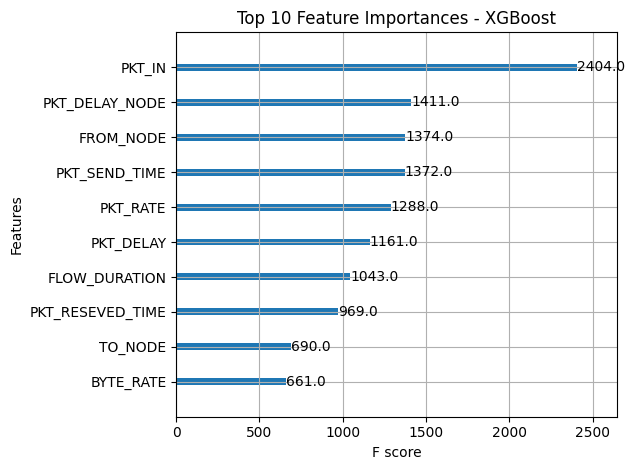

In [ ]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

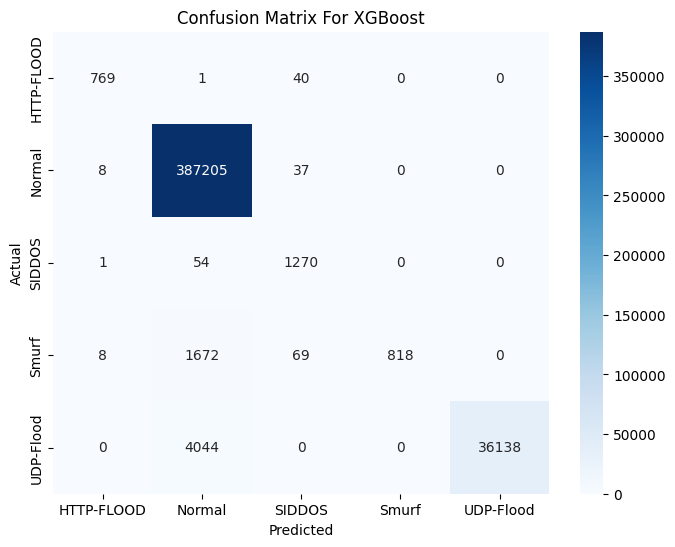

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label.decode('utf-8') for label in le_pkt_class.classes_],
            yticklabels=[label.decode('utf-8') for label in le_pkt_class.classes_])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For XGBoost")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

X_reduced = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:15:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.986272776499882
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       810
           1       0.99      1.00      0.99    387250
           2       0.90      0.96      0.93      1325
           3       1.00      0.32      0.48      2567
           4       1.00      0.90      0.95     40182

    accuracy                           0.99    432134
   macro avg       0.97      0.83      0.86    432134
weighted avg       0.99      0.99      0.99    432134



In [ ]:
X_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(10)])

In [ ]:
X_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.338976e+07,-117547.317890,-424.220475,661.715042,1.559889,21.835522,3.536676,-1.542797,-0.126590,0.011965
1,1.339136e+07,-117635.092574,-424.373623,662.337040,4.052501,-12.405502,5.706873,-1.234697,0.509982,-0.003730
2,-1.051023e+07,-85407.202696,-1734.347965,2766.261408,-2.098054,-42.026718,2.099680,4.257283,-0.504561,-0.008587
3,-1.051062e+07,-85406.598299,-1731.007364,2759.727508,-7.376604,30.575832,1.816691,2.869319,-1.606907,0.009184
4,-1.051045e+07,-85407.500323,-1732.474667,2762.631576,-3.573716,-22.005163,1.716888,3.237229,-0.645409,-0.004987
...,...,...,...,...,...,...,...,...,...,...
2160663,-1.050963e+07,-85400.809884,-1739.437168,2776.013572,-1.722482,-45.897396,-3.869302,-5.855667,2.125895,-0.025908
2160664,-1.050963e+07,-85404.708035,-1739.298233,2775.677475,-6.446071,19.263125,2.214508,3.834392,-1.630024,0.008491
2160665,1.338976e+07,-117459.340610,-424.720009,662.183699,4.963889,-25.238627,3.447614,-1.216426,0.727880,-0.000837
2160666,1.338976e+07,-117603.304799,-424.083255,661.908866,6.653977,-49.023332,-11.950838,3.678850,-0.215574,0.052170


In [ ]:
df_combined = pd.concat([X, y.rename("target")], axis=1)
correlation_matrix = df_combined.corr(numeric_only=True)
correlation_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print(correlation_with_target)

PKT_RATE            0.841112
BYTE_RATE           0.749745
PKT_DELAY           0.489222
PKT_RESEVED_TIME    0.110688
PKT_OUT             0.110629
PKT_R               0.110624
PKT_IN              0.110599
PKT_SEND_TIME       0.110588
TO_NODE             0.108558
PKT_AVG_SIZE        0.087086
PKT_SIZE            0.087086
PKT_DELAY_NODE      0.061408
UTILIZATION         0.026272
NUMBER_OF_BYTE      0.026272
FLAG_R             -0.005459
FROM_NODE          -0.071915
PKT_TYPE           -0.079853
NUMBER_OF_PKT      -0.300938
FLOW_DURATION      -0.822833
Name: target, dtype: float64


<ipython-input-85-760bb89da438>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


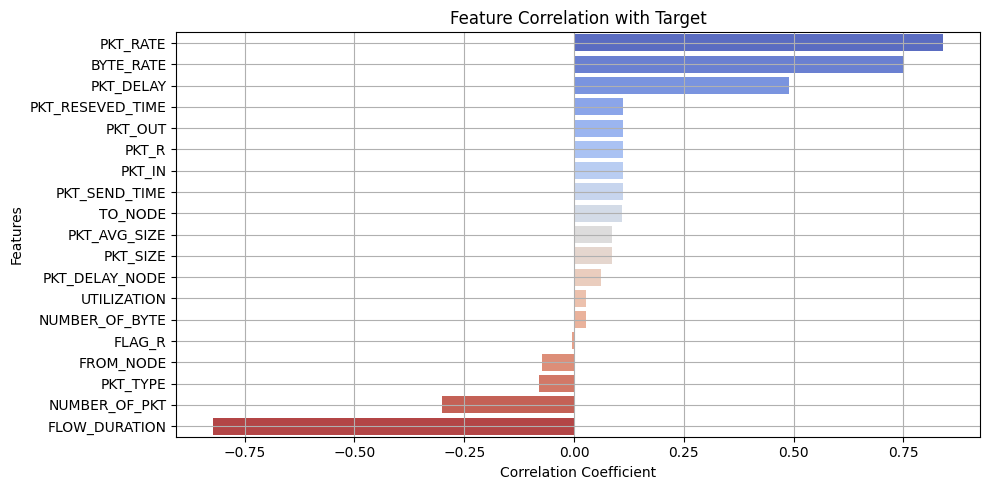

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([X, y.rename("target")], axis=1)
correlation_matrix = df_combined.corr(numeric_only=True)
correlation_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print(correlation_with_target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9862450073356875
Confusion Matrix:
 [[   770      0     40      0      0]
 [     8 387201     37      0      4]
 [     4     58   1263      0      0]
 [     8   1672     69    818      0]
 [     0   4044      0      0  36138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       810
           1       0.99      1.00      0.99    387250
           2       0.90      0.95      0.92      1325
           3       1.00      0.32      0.48      2567
           4       1.00      0.90      0.95     40182

    accuracy                           0.99    432134
   macro avg       0.97      0.82      0.86    432134
weighted avg       0.99      0.99      0.99    432134

